# 04 - Applied ML

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
import networkx as nx
%matplotlib inline

# Question 1
## 1. A naive analysis

In [20]:
data = pd.read_csv('lalonde.csv')
data.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [45]:
data_treated = data[data["treat"] == 1]
data_untreated = data[data["treat"] == 0]

def plot_feature(feature_name):
    r_min = data[feature_name].min()
    r_max = data[feature_name].max()
        
    plt.figure(figsize=(16,6))
    plt.suptitle(feature_name, fontsize=20)
    ax = plt.subplot(1,2,1)
    plt.hist(data_treated[feature_name], normed=True, bins=20, range=(r_min, r_max))
    plt.title("Treated people", fontsize=14)
    plt.subplot(1,2,2, sharey=ax)
    plt.title("Untreated people", fontsize=14)
    plt.hist(data_untreated[feature_name], normed=True, bins=20, range=(r_min, r_max))
    plt.show()

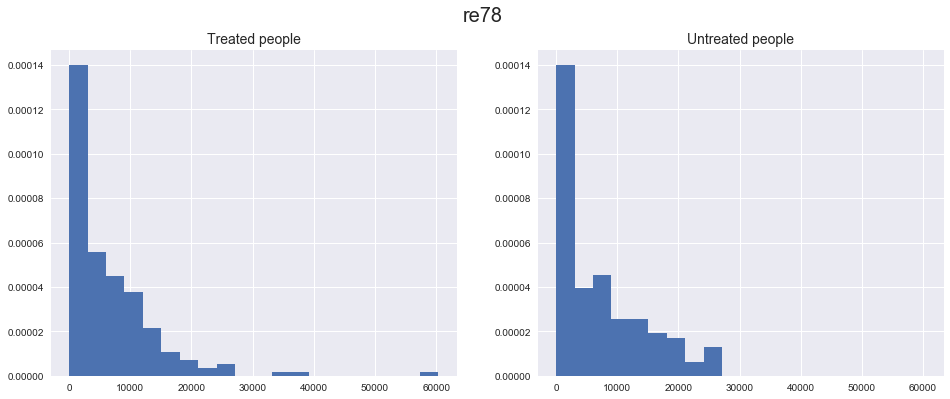

In [47]:
plot_feature('re78')

## 2. A closer look at the data

In [54]:
data_features = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75', 're78']
data_features.remove('re78')
data_features

['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']

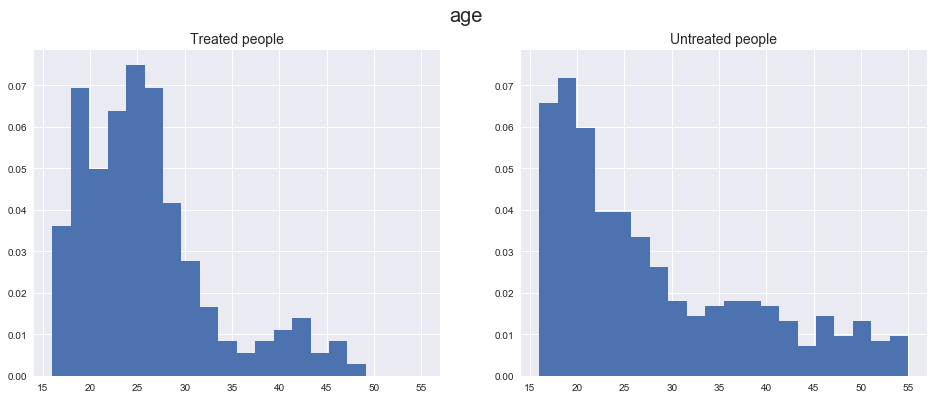

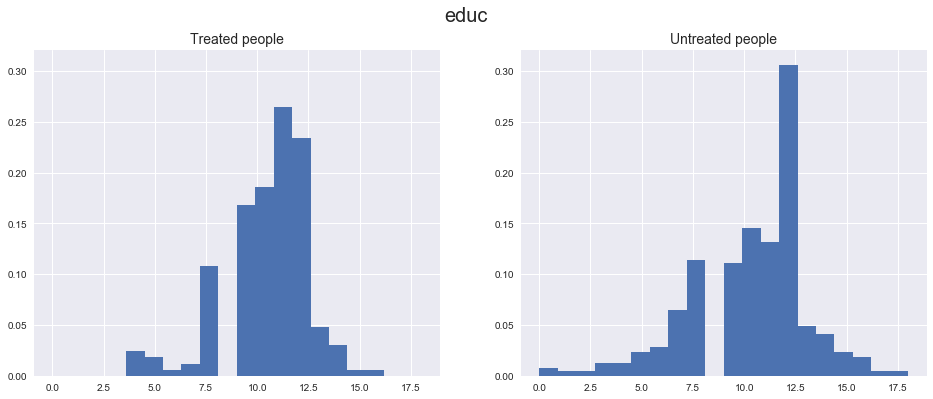

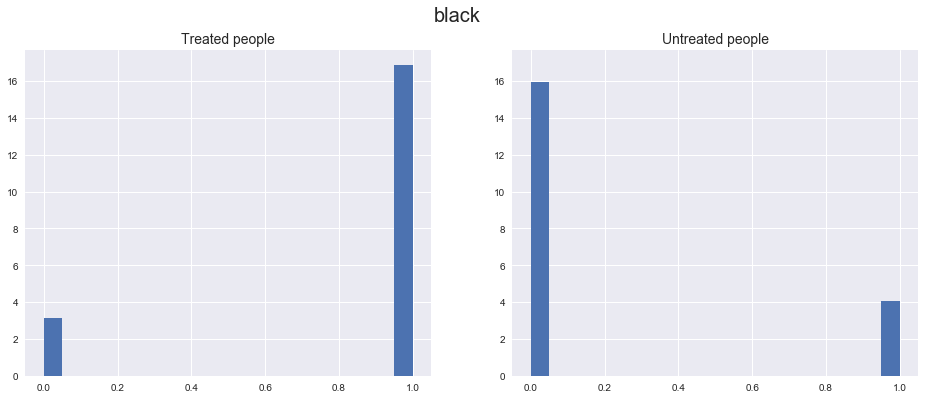

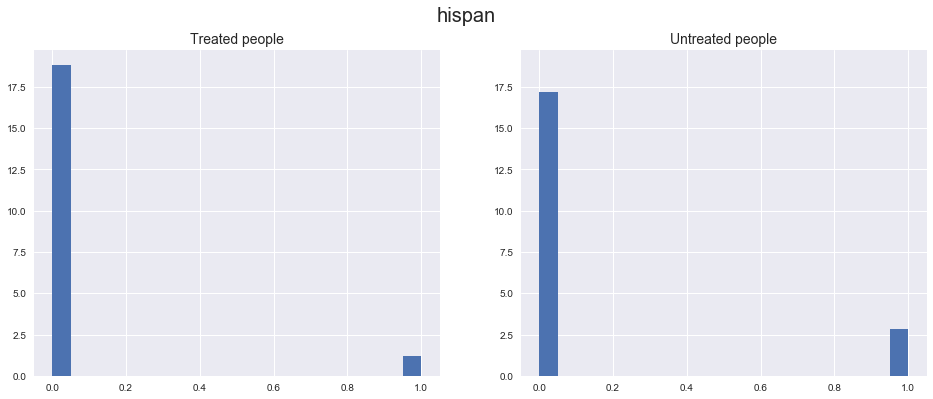

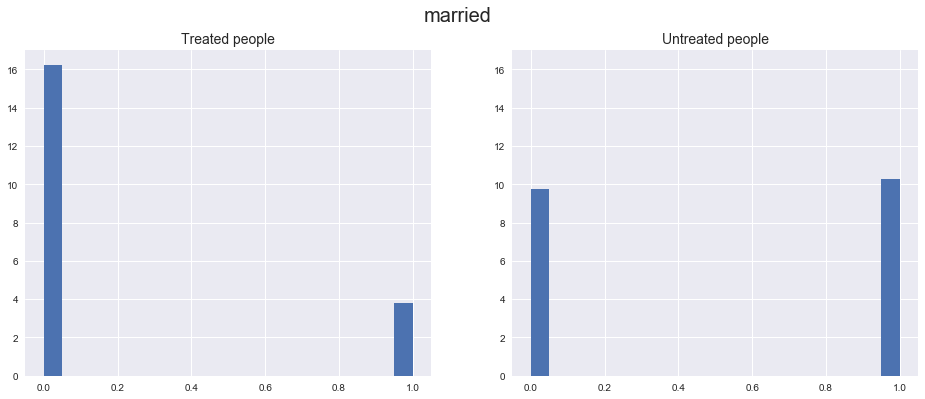

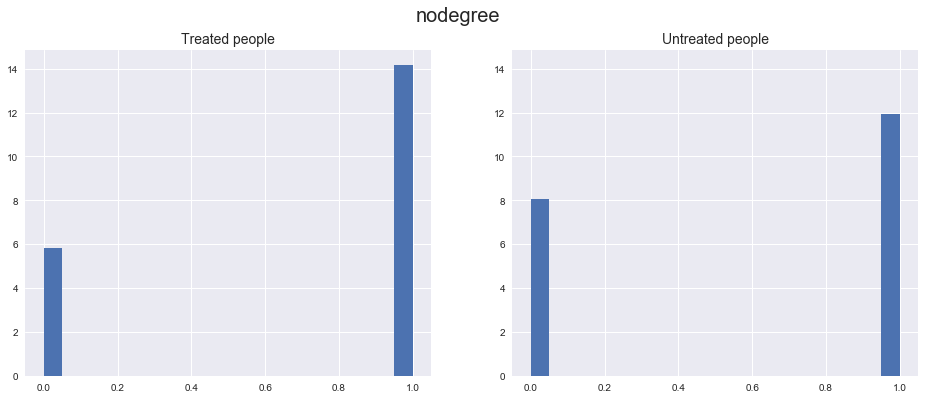

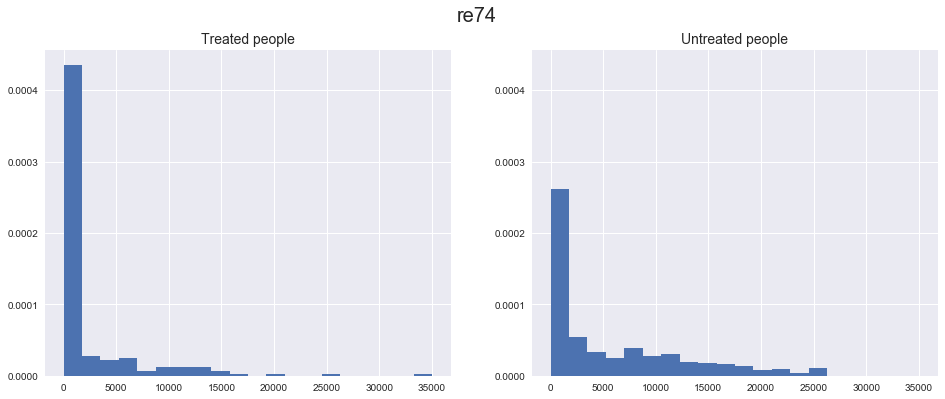

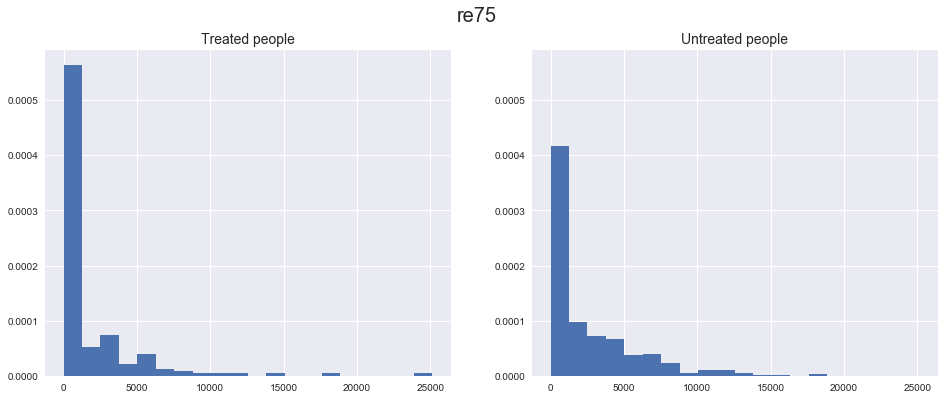

In [46]:
for col in ["age", "educ", "black", "hispan", "married", "nodegree", "re74", "re75"]:
    plot_feature(col)

## 3. A propsensity score model

In [48]:
# The features vector
X = data[data_features]
# The label vector
y = data['treat']

logistic = LogisticRegression()
logistic.fit(X, y)
pred_prob = logistic.predict_proba(X)
pred_prob

array([[ 0.54192649,  0.45807351],
       [ 0.84801994,  0.15198006],
       [ 0.24903448,  0.75096552],
       ..., 
       [ 0.89944167,  0.10055833],
       [ 0.44954653,  0.55045347],
       [ 0.79880343,  0.20119657]])

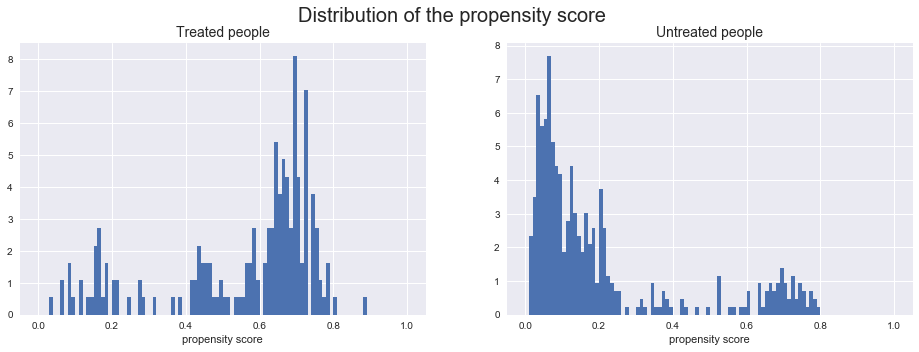

0.555452610037
0.204154560636


In [70]:
treated_idx = (data['treat'] == 1)
untreated_idx = (data['treat'] == 0)

pred_prob_treated = pred_prob[treated_idx, 1]
pred_prob_untreated = pred_prob[untreated_idx, 1]

plt.figure(figsize=(16,5))
plt.suptitle("Distribution of the propensity score", fontsize=20)
plt.subplot(1,2,1)
plt.hist(pred_prob_treated, bins=100, range=(0, 1), normed=True)
plt.xlabel('propensity score')
plt.title("Treated people", fontsize=14)

plt.subplot(1,2,2)
plt.hist(pred_prob_untreated, bins=100, range=(0, 1), normed=True)
plt.title("Untreated people", fontsize=14)
plt.xlabel('propensity score')
plt.show()

print(np.mean(pred_prob_treated))
print(np.mean(pred_prob_untreated))